# Regresión polinómica:

Se crean datos sintéticos para realizar la regrresión a un polinomio.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Dataset generado')

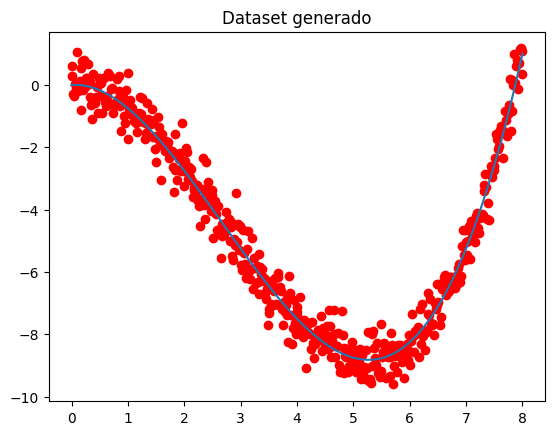

In [ ]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio.


**Ejercicio en clase/casa**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores, los datos van a tener un mal ajuste, y con grados superiores puede existir sobre entrenamiento, por ejemplo desde grado 20 se empiezan a notar problemas de ajuste.

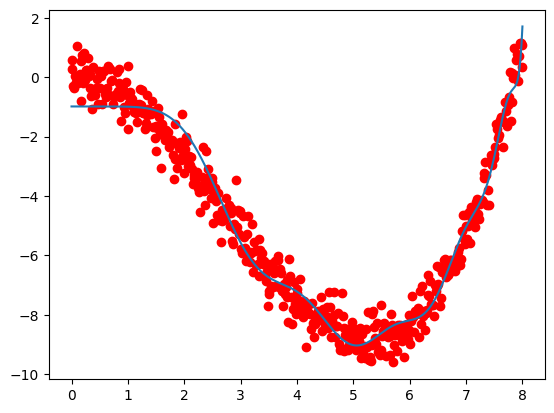

In [ ]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)


Estadísticas




,Grados,mse,rmse,R^2
0,1,7.296393,2.701184,0.255559
1,2,1.638215,1.279928,0.832855
2,3,0.243276,0.493230,0.975179
3,4,0.243276,0.493230,0.975179
4,5,0.243276,0.493230,0.975179
5,10,0.243276,0.493230,0.975179
6,20,0.468240,0.684281,0.952226
7,30,4.155771,2.038571,0.575992
8,40,6.335067,2.516956,0.353642


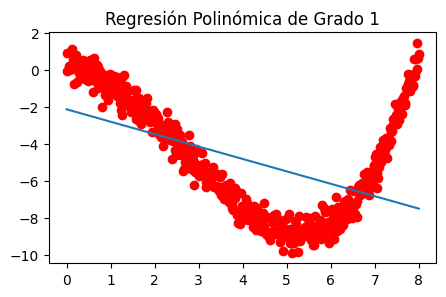

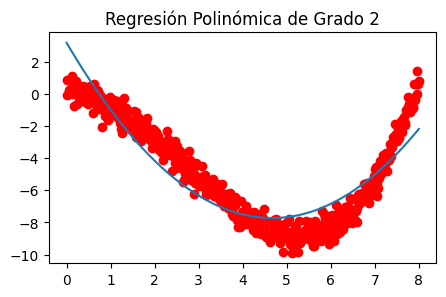

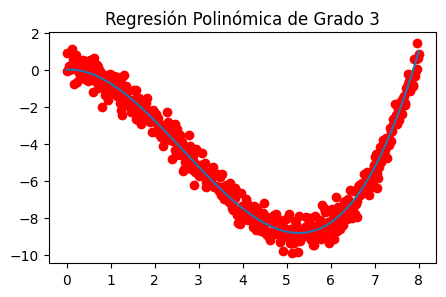

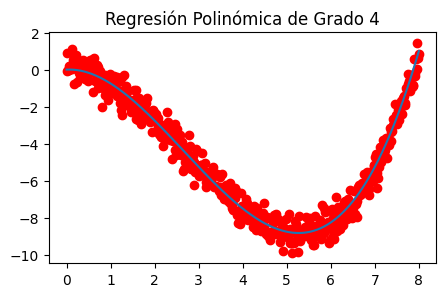

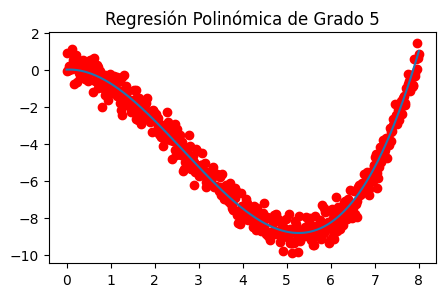

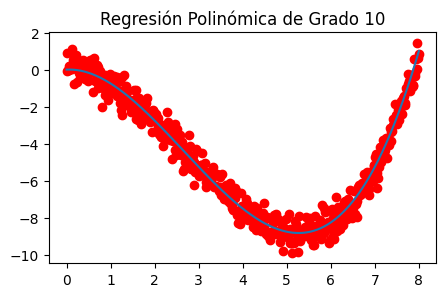

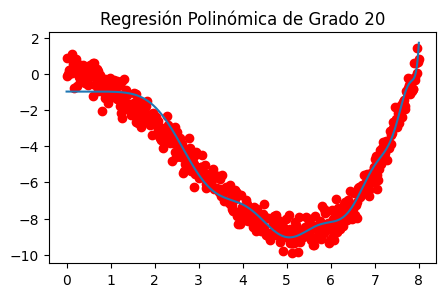

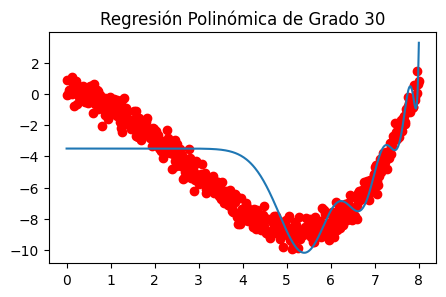

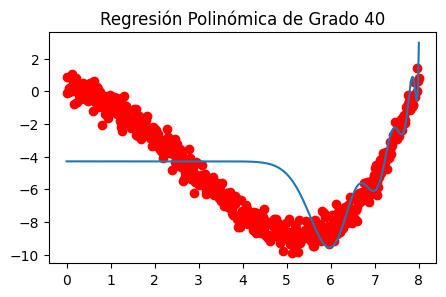

In [20]:
#Regresión polinómica
#creando un objeto para la regresión polinómica con diferentes grados
#Así mismo mostrando las estadísticas al comienzo

# Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
X=X_data
y=y_data2

degrees = [1, 2, 3, 4, 5, 10, 20, 30, 40]
mse_list = []
rmse_list = []
r2_list = []

def polynomial_plot_2(feature, label, degree):
    x_data = feature
    y_data2 = label
    poly_regressor = PolynomialFeatures(degree=degree)
    poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
    # como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
    model = LinearRegression()
    model.fit(poly_features, y_data)

    y_pred = model.predict(poly_features)
    mse = mean_squared_error(y_data2, y_pred)
    mse_list.append(mse)
    rmse = mean_squared_error(y_data2, y_pred)**0.5
    rmse_list.append(rmse)
    r2 = r2_score(y_data2, y_pred)
    r2_list.append(r2)

    plt.figure(figsize=(5, 3))
    plt.title(f'Regresión Polinómica de Grado {degree}')
    plt.scatter(x_data, y_data2, c='r')
    plt.plot(x_data, y_pred)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
for degree in degrees:
  # Llamar a la función con X, Y y degree=1
  polynomial_plot_2(X, y, degree)

data_dict = {"Grados":degrees,
             "mse":mse_list,
             "rmse":rmse_list,
             "R^2":r2_list} #,

# Turn a dictionary into a dataframe
df = pd.DataFrame(data_dict)

# Definir el estilo para agregar un marco alrededor de la tabla
styled_df = df.style.set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Imprimir el DataFrame formateado
print("\033[1;35m")
print('Estadísticas')
print ("\033[0;30m")
print()
display(styled_df)
